# **OPTIMISING TEST SIZE VALUE FOR ACCURACY**

In [31]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd

# DATA PRE-PROCESSING
df = pd.read_csv('/content/titanicsurvival.csv')
df = df.fillna(0)
dfx = df.drop("Fare", axis=1)

mean = dfx['Age'].mean()
dfx['Age'] = dfx['Age'].replace(0, mean)
dfx['Sex'] = dfx['Sex'].map({'male': '0', 'female': '1'})

# ASSIGNING VARIABLES
x = dfx.iloc[:, :-1].values
y = dfx.iloc[:, -1].values

# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

a = np.arange(0.1,0.5,0.0005)
op = []
for i in range(len(a)):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=a[i], random_state=0)
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
    knn.fit(X_train_sc, Y_train)
    lr_pred = knn.predict(X_test_sc)
    acc = accuracy_score(Y_test, lr_pred) * 100
    op.append(acc)

data = {'Test_size':a,'Accuracy':op}
best = pd.DataFrame(data)
best

,Test_size,Accuracy
0,0.1000,74.444444
1,0.1005,74.444444
2,0.1010,74.444444
3,0.1015,80.219780
4,0.1020,80.219780
...,...,...
795,0.4975,77.927928
796,0.4980,77.927928
797,0.4985,78.426966
798,0.4990,78.426966


In [32]:
#finding the maximum value of accuracy and printing corresponding 
#test_size value 

max_x = best.loc[best['Accuracy'].idxmax()]
print( "Maximum value of accuracy  and its corresponding test size values:\n", max_x)

Maximum value of accuracy  and its corresponding test size values:
 Test_size     0.212500
Accuracy     85.789474
Name: 225, dtype: float64


**so we have, 85.78% as highest possible accuracy and the corresponding test_size is 0.2125**

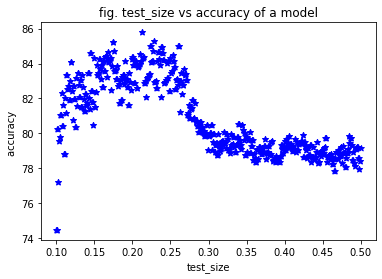

In [34]:
from matplotlib import markers
x = [a]
y = [op]

import matplotlib.pyplot as plt
plt.scatter(x,y,color='b',marker='*')
plt.xlabel('test_size')
plt.ylabel('accuracy ')
plt.title('fig. test_size vs accuracy of a model')
plt.show()